<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
NBA Finals</p><br><br>

'champsdata.csv' and runnerupsdata.csv'

'champs.csv' contains game-by-game team totals for the championship team from every finals game between 1980 and 2017. 'runnerups.csv' contains game-by-game team totals for the runner-up team from every finals game between 1980 and 2017. 

The 1980 NBA Finals was the first Finals series since the NBA added the three point line.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Importing the necessary libraries</p>

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
NBA Champions</p>

In [204]:
champs = pd.read_csv('./data/nba-finals-team-stats/championsdata.csv')

In [205]:
champs.shape
print('Number of coumns: ', champs.shape[0])
print('Number of rows: ', champs.shape[1])

Number of coumns:  216
Number of rows:  25


In [206]:
champs.head()

,X,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Lakers,1,1,1,240,48,89,0.539,0,0,NaN,13,15,0.867,12,31,43,30,5,9,17,24,109
1,2,1980,Lakers,2,0,1,240,48,95,0.505,0,1,0.0,8,12,0.667,15,37,52,32,12,7,26,27,104
2,3,1980,Lakers,3,1,0,240,44,92,0.478,0,1,0.0,23,30,0.767,22,34,56,20,5,5,20,25,111
3,4,1980,Lakers,4,0,0,240,44,93,0.473,0,0,NaN,14,19,0.737,18,31,49,23,12,6,19,22,102
4,5,1980,Lakers,5,1,1,240,41,91,0.451,0,0,NaN,26,33,0.788,19,37,56,28,7,6,21,27,108


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Variables in 'champs.csv' and 'runnerups.csv'</p>
<br>
**Year -** The year the series was played
**Team -** The name of the team.
**Win -** 1 = Win. 0 = Loss
**Home -** 1 = Home team. 0 = Away team.
**Game -** Game #
**MP -** Total minutes played. Equals 240 (48x5=240) if game did not go to overtime. MP>240 if game went to overtime.
**FG -** Field goals made
**FGA -** Field goal attempts
**FGP -** Field Goal Percentage
**TP -** 3 Point Field Goals Made
**TPA -** Three point attempts
**TPP -** three point percentage
**FT -** Free throws made
**FTA -** Free throws attempted
**FTP -** Free throw percentage
**ORB -** Offensive rebounds
**DRB -** Defensive rebounds
**TRB -** Total rebounds
**AST -** Assists
**STL -** Steals
**BLK -** Blocks
**TOV -** Turnovers
**PF -** Personal fouls
**PTS -** points scored

In [207]:
champs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 25 columns):
X       216 non-null object
Year    216 non-null int64
Team    216 non-null object
Game    216 non-null int64
Win     216 non-null int64
Home    216 non-null int64
MP      216 non-null int64
FG      216 non-null int64
FGA     216 non-null int64
FGP     216 non-null float64
TP      216 non-null int64
TPA     216 non-null int64
TPP     210 non-null float64
FT      216 non-null int64
FTA     216 non-null int64
FTP     216 non-null float64
ORB     216 non-null int64
DRB     216 non-null int64
TRB     216 non-null int64
AST     216 non-null int64
STL     216 non-null int64
BLK     216 non-null int64
TOV     216 non-null int64
PF      216 non-null int64
PTS     216 non-null int64
dtypes: float64(3), int64(20), object(2)
memory usage: 42.3+ KB


In [208]:
#Changing the type of column Year
champs.Year = champs.Year.astype('category')

In [210]:
#checking if the name of columns are correct
champs.columns

Index(['X', 'Year', 'Team', 'Game', 'Win', 'Home', 'MP', 'FG', 'FGA', 'FGP',
       'TP', 'TPA', 'TPP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [211]:
#checking name of teams
champs.Team.unique()

array(['Lakers', 'Celtics', 'Sixers', 'Pistons', 'Bulls', 'Rockets',
       'Spurs', 'Heat', 'Mavericks', "'Heat'", 'Warriors', 'Cavaliers',
       'Warriorrs'], dtype=object)

In [243]:
champs[champs.Team.str.contains("Warriorrs") + champs.Team.str.contains("'Heat'")]

,X,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [213]:
#Correcting names of teams
champs.loc[186,'Team'] = 'Heat'
champs.loc[214, 'Team'] = 'Warriors'

In [214]:
champs.Team.unique()

array(['Lakers', 'Celtics', 'Sixers', 'Pistons', 'Bulls', 'Rockets',
       'Spurs', 'Heat', 'Mavericks', 'Warriors', 'Cavaliers'],
      dtype=object)

In [215]:
#Checking for null values
champs.isnull().values.any()

True

In [216]:
champs[champs.isnull().any(axis=1)]
pd.options.display.max_columns = None
display(champs[champs.isnull().any(axis=1)])

,X,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Lakers,1,1,1,240,48,89,0.539,0,0,NaN,13,15,0.867,12,31,43,30,5,9,17,24,109
3,4,1980,Lakers,4,0,0,240,44,93,0.473,0,0,NaN,14,19,0.737,18,31,49,23,12,6,19,22,102
4,5,1980,Lakers,5,1,1,240,41,91,0.451,0,0,NaN,26,33,0.788,19,37,56,28,7,6,21,27,108
12,13,1982,Lakers,1,1,0,240,49,93,0.527,0,0,NaN,26,35,0.743,19,31,50,34,11,7,22,26,124
17,18,1982,Lakers,6,1,1,240,47,87,0.540,0,0,NaN,20,25,0.800,15,34,49,33,12,11,22,26,114
18,19,1983,Sixers,1,1,1,240,45,96,0.469,0,0,NaN,23,31,0.742,21,32,53,26,11,13,14,22,113


In [374]:
def delete(data, values):
    for i in values:
        del data[i]

In [367]:
#deleteing columns with percentage and null values
delete(champs, ['TPP', 'FTP', 'FGA'])

In [368]:
champs.shape

(216, 22)

In [913]:
champs.head()

,X,Year,Team,Game,Win,Home,MP,FG,FGP,TP,TPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Lakers,1,1,1,240,48,0.539,0,0,13,15,12,31,43,30,5,9,17,24,109
1,2,1980,Lakers,2,0,1,240,48,0.505,0,1,8,12,15,37,52,32,12,7,26,27,104
2,3,1980,Lakers,3,1,0,240,44,0.478,0,1,23,30,22,34,56,20,5,5,20,25,111
3,4,1980,Lakers,4,0,0,240,44,0.473,0,0,14,19,18,31,49,23,12,6,19,22,102
4,5,1980,Lakers,5,1,1,240,41,0.451,0,0,26,33,19,37,56,28,7,6,21,27,108


---

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
NBA Runnerups</p>

In [393]:
runnerups = pd.read_csv('./data/nba-finals-team-stats/runnerupsdata.csv')

In [394]:
runnerups.head()

,Y,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Sixers,1,0,0,240,40,90,0.444,0,2,0.00,22,28,0.786,14,26,40,28,12,13,14,17,102
1,2,1980,Sixers,2,1,0,240,43,85,0.506,0,1,0.00,21,27,0.778,5,29,34,34,14,11,20,21,107
2,3,1980,Sixers,3,0,1,240,45,93,0.484,1,4,0.25,10,17,0.588,13,24,37,34,12,8,13,25,101
3,4,1980,Sixers,4,1,1,240,41,79,0.519,0,0,NaN,23,26,0.885,5,29,34,31,5,10,14,20,105
4,5,1980,Sixers,5,0,0,240,42,94,0.447,0,3,0.00,19,24,0.792,13,29,42,32,9,7,12,25,103


In [395]:
runnerups.shape

(216, 25)

In [396]:
runnerups.columns

Index(['Y', 'Year', 'Team', 'Game', 'Win', 'Home', 'MP', 'FG', 'FGA', 'FGP',
       'TP', 'TPA', 'TPP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [397]:
runnerups.Team.unique()

array(['Sixers', 'Rockets', 'Lakers', 'Celtics', 'Pistons', 'Blazers',
       'Suns', 'Knicks', 'Magic', 'Sonics', 'Jazz', 'Pacers', 'Nets',
       'Mavericks', 'Cavaliers', 'Heat', 'Thunder', 'Spurs', 'Warriors'],
      dtype=object)

In [398]:
#checking for null values
runnerups.isnull().values.any()

True

In [399]:
runnerups[runnerups.isnull().any(axis=1)]

,Y,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,4,1980,Sixers,4,1,1,240,41,79,0.519,0,0,NaN,23,26,0.885,5,29,34,31,5,10,14,20,105
16,17,1982,Sixers,5,1,1,240,56,94,0.596,0,0,NaN,23,34,0.676,13,26,39,37,14,13,11,18,135
25,26,1984,Lakers,4,0,1,265,50,85,0.588,0,0,NaN,25,39,0.641,12,34,46,31,8,5,20,27,125


In [400]:
#deleteing columns with percentage and null values
delete(runnerups, ['FGP', 'TPP', 'FTP'])

In [401]:
runnerups.shape

(216, 22)

In [419]:
runnerups.head()

,Y,Year,Team,Game,Win,Home,MP,FG,FGA,TP,TPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Sixers,1,0,0,240,40,90,0,2,22,28,14,26,40,28,12,13,14,17,102
1,2,1980,Sixers,2,1,0,240,43,85,0,1,21,27,5,29,34,34,14,11,20,21,107
2,3,1980,Sixers,3,0,1,240,45,93,1,4,10,17,13,24,37,34,12,8,13,25,101
3,4,1980,Sixers,4,1,1,240,41,79,0,0,23,26,5,29,34,31,5,10,14,20,105
4,5,1980,Sixers,5,0,0,240,42,94,0,3,19,24,13,29,42,32,9,7,12,25,103


---

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Making insights<br><br></p>

<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Number of games played in each final<br><br></p>

In [868]:
gamesPlayed = champs[['Year', 'Game']].groupby('Year', as_index=False).count()
gamesPlayed.head()

,Year,Game
0,1980,6
1,1981,6
2,1982,6
3,1983,4
4,1984,7


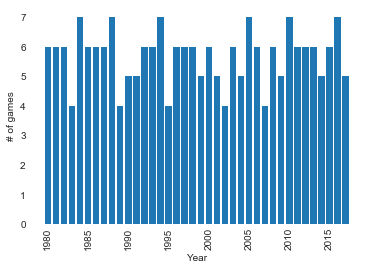

In [869]:
plt.bar(gamesPlayed.Year,gamesPlayed.Game,align='center') 
plt.xlabel('Year')
plt.ylabel('# of games')
plt.xticks(rotation='vertical')
plt.show()

<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Number of games each team played in finals<br><br></p>

In [870]:
gamesChamps = champs[['Game', 'Team']].groupby('Team', as_index=False).count()
gamesChamps.head()

,Team,Game
0,Bulls,35
1,Cavaliers,7
2,Celtics,25
3,Heat,18
4,Lakers,58


In [871]:
gamesRunnerups = runnerups[['Team', 'Game']].groupby('Team', as_index=False).count()
gamesRunnerups.head()

,Team,Game
0,Blazers,11
1,Cavaliers,15
2,Celtics,19
3,Heat,11
4,Jazz,12


In [872]:
gamesByTeam = gamesChamps.merge(gamesRunnerups, on='Team', how='inner')

In [873]:
gamesByTeam

,Team,Game_x,Game_y
0,Cavaliers,7,15
1,Celtics,25,19
2,Heat,18,11
3,Lakers,58,31
4,Mavericks,6,6
5,Pistons,14,14
6,Rockets,11,12
7,Sixers,4,17
8,Spurs,27,7
9,Warriors,11,7


In [874]:
gamesByTeam.columns = ['Team', 'GamesAsChamp', 'GamesAsRunnerup']

In [875]:
gamesByTeam['GamesTotal'] = gamesByTeam.GamesAsChamp + gamesByTeam.GamesAsRunnerup

In [876]:
gamesByTeam

,Team,GamesAsChamp,GamesAsRunnerup,GamesTotal
0,Cavaliers,7,15,22
1,Celtics,25,19,44
2,Heat,18,11,29
3,Lakers,58,31,89
4,Mavericks,6,6,12
5,Pistons,14,14,28
6,Rockets,11,12,23
7,Sixers,4,17,21
8,Spurs,27,7,34
9,Warriors,11,7,18


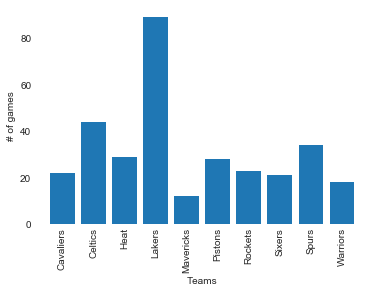

In [878]:
plt.bar(gamesByTeam.Team,gamesByTeam.GamesTotal,align='center') 
plt.xlabel('Teams')
plt.ylabel('# of games')
plt.xticks(rotation='vertical')
plt.show()

<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Winning team by each year<br><br></p>

In [879]:
gamesByYear = gamesPlayed.Game.tolist()

In [880]:
champTeams = champs.Team.tolist()

In [881]:
runnerupTeams = runnerups.Team.tolist()

In [882]:
championsList = []
i = 0 
for x in range(len(gamesByYear)):
    championsList.append(champTeams[i])
    i = i + gamesByYear[x]

In [883]:
runnerupsList = []
i = 0 
for x in range(len(gamesByYear)):
    runnerupsList.append(runnerupTeams[i])
    i = i + gamesByYear[x]

In [884]:
#checking if number of teams matches number of unique years in champs table
len(champions) - len(champs.Year.unique())

0

In [885]:
year = champs.Year.unique().tolist()

In [886]:
len(length) - len(champions)

0

In [887]:
length = list(range(0,len(champions)))

In [888]:
series = {'Year': pd.Series(year, index=[length]),
          'ChampionTeam': pd.Series(championsList, index=[length]),
          'RunnerupTeam': pd.Series(runnerupsList, index=[length])}

In [889]:
finals = pd.DataFrame(series)

In [892]:
finals.tail()

,ChampionTeam,RunnerupTeam,Year
33,Heat,Spurs,2013
34,Spurs,Heat,2014
35,Warriors,Cavaliers,2015
36,Cavaliers,Warriors,2016
37,Warriors,Cavaliers,2017


<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Result in finals<br><br></p>

In [690]:
chamionTeams = champs.Team.tolist()
runnerupsTeams = runnerups.Team.tolist()
games = champs.Game.tolist()
championPoints = champs.PTS.tolist()
runnerupPoints = runnerups.PTS.tolist()
length1 = list(range(0, len(chamionTeams)))

In [691]:
series1 = {'Team1': pd.Series(chamionTeams, index=[length1]),
           'Team2': pd.Series(runnerupsTeams, index=[length1]),
           'Game': pd.Series(games, index=[length1]),
           'Team1Points':pd.Series(championPoints, index=[length1]),
           'Team2Points': pd.Series(runnerupPoints, index=[length1])}

In [692]:
finalsResult = pd.DataFrame(series1)

In [693]:
finalsResult.tail()

,Game,Team1,Team1Points,Team2,Team2Points
211,1,Warriors,113,Cavaliers,91
212,2,Warriors,132,Cavaliers,113
213,3,Warriors,118,Cavaliers,113
214,4,Warriors,116,Cavaliers,137
215,5,Warriors,129,Cavaliers,120


In [694]:
home = [] 
for i in range(len(finalsResult)):
    if champs.Home[i] == 1:
        home.append(chamionTeams[i])
        #home.append(finalsResult.Team1[i])
    else:
        home.append(runnerupsTeams[i])
        #home.append(finalsResult.Team2[i])

In [695]:
finalsResult['Home'] = home

In [696]:
finalsResult.head()

,Game,Team1,Team1Points,Team2,Team2Points,Home
0,1,Lakers,109,Sixers,102,Lakers
1,2,Lakers,104,Sixers,107,Lakers
2,3,Lakers,111,Sixers,101,Sixers
3,4,Lakers,102,Sixers,105,Sixers
4,5,Lakers,108,Sixers,103,Lakers


<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Average number of three point shuts in finals by year<br><br></p>

In [697]:
threePointAttempts = champs[['Year', 'TPA']].groupby('Year', as_index=False).mean().round(1)
threePointAttempts.head()

,Year,TPA
0,1980,0.7
1,1981,2.8
2,1982,1.5
3,1983,0.8
4,1984,3.3


In [698]:
threePointAttempts.to_csv('./data/nba-finals-team-stats/threePointAttempts.csv', header=None, index=None, sep=' ', mode='a')

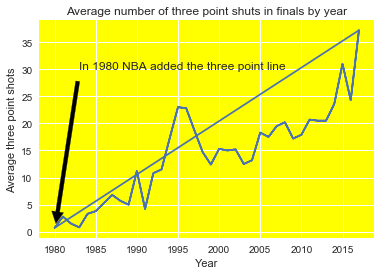

In [1041]:
fig = plt.figure()
ax = fig.add_subplot(111)

data = np.loadtxt('./data/nba-finals-team-stats/threePointAttempts.csv')
sns.set_style('dark', {'axes.facecolor':'yellow'}) 
a1 = plt.plot(data[:,0], data[:,1])

# Label the axes
plt.xlabel('Year')
plt.ylabel('Average three point shots')
plt.title('Average number of three point shuts in finals by year')

ax.annotate('In 1980 NBA added the three point line', xy=(1980, 0), xytext=(1983, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.grid(True)
plt.show()

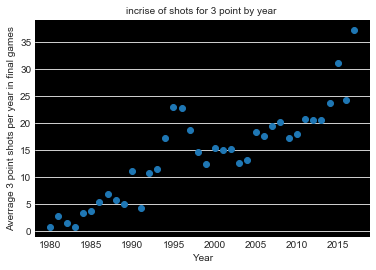

In [747]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel
sns.set_style('dark', {'axes.facecolor':'black'}) 

axis.yaxis.grid(True)
axis.set_title('incrise of shots for 3 point by year ',fontsize=10)
axis.set_xlabel('Year',fontsize=10)
axis.set_ylabel('Averrage 3 point shots per year in final games',fontsize=10)

X = threePointAttempts['Year']
Y = threePointAttempts['TPA']

axis.scatter(X, Y)
plt.show()

<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Averrage number of three point shots in finals<br><br></p>

In [701]:
print(gamesByTeam.shape)
print(threePointAttempts.shape)

(10, 4)
(38, 2)


In [702]:
TPA = champs[['Team', 'TPA']].groupby('Team', as_index=False).mean().round(1)

In [853]:
avgThreePoint = gamesByTeam.merge(TPA, on='Team', how='inner')

In [856]:
delete(avgThreePoint, ['TPA_y'])

In [858]:
avgThreePoint.columns

Index(['Team', 'GamesAsChamp', 'GamesAsRunnerup', 'GamesTotal', 'TPA_x'], dtype='object')

In [865]:
avgThreePoint.columns = (['Team', 'GamesAsChamp', 'GamesAsRunnerup', 'GamesTotal', 'TPA'])

In [866]:
avgThreePoint.head()

,Team,GamesAsChamp,GamesAsRunnerup,GamesTotal,TPA
0,Cavaliers,7,15,22,24.3
1,Celtics,25,19,44,7.7
2,Heat,18,11,29,19.5
3,Lakers,58,31,89,9.6
4,Mavericks,6,6,12,20.7


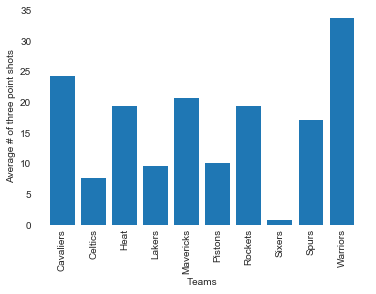

In [867]:
p1 = plt.bar(avgThreePoint.Team, avgThreePoint.TPA, align='center', ) 
plt.xlabel('Teams')
plt.ylabel('Average # of three point shots')
plt.xticks(rotation='vertical')
plt.show()

<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Averrage number of points in finals<br><br></p>

In [781]:
avgPointsScored1 = champs[['Team', 'PTS']].groupby('Team', as_index=False).mean().round(1)

In [782]:
avgPointsScored2 = runnerups[['Team', 'PTS']].groupby('Team', as_index=False).mean().round(1)

In [783]:
avgPointsScored = avgPointsScored1.merge(avgPointsScored2, on='Team', how='inner')

In [784]:
print(avgPointsScored.shape)
avgPointsScored['PTS'] = None
avgPointsScored.head()

(10, 3)


,Team,PTS_x,PTS_y,PTS
0,Cavaliers,100.4,97.1,None
1,Celtics,106.0,102.9,None
2,Heat,97.0,92.0,None
3,Lakers,105.2,98.8,None
4,Mavericks,94.7,91.8,None


In [785]:
for i in range(len(avgPointsScored)):
    avgPointsScored['PTS'][i] = (avgPointsScored.PTS_x[i] + avgPointsScored.PTS_y[i]) / 2

In [788]:
avgPointsScored.columns = ('Team', 'PTS_W', 'PTS_L', 'PTS')

In [789]:
avgPointsScored.head()

,Team,PTS_W,PTS_L,PTS
0,Cavaliers,100.4,97.1,98.75
1,Celtics,106.0,102.9,104.45
2,Heat,97.0,92.0,94.5
3,Lakers,105.2,98.8,102
4,Mavericks,94.7,91.8,93.25


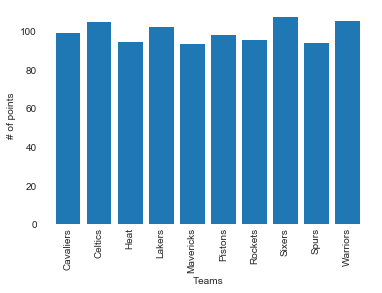

In [849]:
p1 = plt.bar(avgPointsScored.Team, avgPointsScored.PTS, align='center', ) 
plt.xlabel('Teams')
plt.ylabel('# of points')
plt.xticks(rotation='vertical')
plt.show()

<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Number of titles by each team<br><br></p>

In [ ]:
plt.plot(gamesByTeam['Team'], gamesByTeam['GamesTotal'], c='Blue', ls='--', marker='s')
plt.xticks(rotation='vertical')
plt.show()

In [893]:
finals.head()

,ChampionTeam,RunnerupTeam,Year
0,Lakers,Sixers,1980
1,Celtics,Rockets,1981
2,Lakers,Sixers,1982
3,Sixers,Lakers,1983
4,Celtics,Lakers,1984


In [905]:
titlesByTeam = finals[['ChampionTeam', 'Year']].groupby('ChampionTeam', as_index=False).count()

In [906]:
titlesByTeam.columns = ['Team', 'numberOfWins']

In [907]:
titlesByTeam.head()

,Team,numberOfWins
0,Bulls,6
1,Cavaliers,1
2,Celtics,4
3,Heat,3
4,Lakers,10


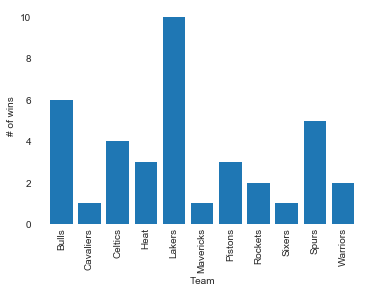

In [908]:
p1 = plt.bar(titlesByTeam.Team, titlesByTeam.numberOfWins, align='center', ) 
plt.xlabel('Team')
plt.ylabel('# of wins')
plt.xticks(rotation='vertical')
plt.show()

<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Correlation between points scored on match and othrer stats<br><br></p>

In [996]:
champs.head()

,X,Year,Team,Game,Win,Home,MP,FG,FGP,TP,TPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Lakers,1,1,1,240,48,0.539,0,0,13,15,12,31,43,30,5,9,17,24,109
1,2,1980,Lakers,2,0,1,240,48,0.505,0,1,8,12,15,37,52,32,12,7,26,27,104
2,3,1980,Lakers,3,1,0,240,44,0.478,0,1,23,30,22,34,56,20,5,5,20,25,111
3,4,1980,Lakers,4,0,0,240,44,0.473,0,0,14,19,18,31,49,23,12,6,19,22,102
4,5,1980,Lakers,5,1,1,240,41,0.451,0,0,26,33,19,37,56,28,7,6,21,27,108


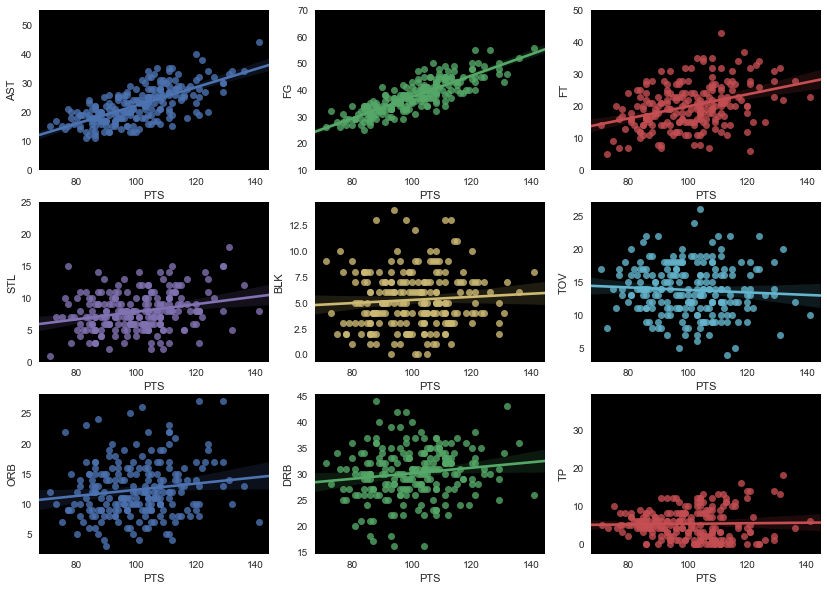

In [1085]:
sns.set_style('dark', {'axes.facecolor':'black'})
#sns.set(color_codes=True)

f, ax = plt.subplots(3, 3, figsize=(14,10))

s1 = sns.regplot(data=champs, x='PTS', y='AST', fit_reg=True, ax=ax[0,0])
s2 = sns.regplot(data=champs, x='PTS', y='FG', fit_reg=True, ax=ax[0,1])
s3 = sns.regplot(data=champs, x='PTS', y='FT', fit_reg=True, ax=ax[0,2])
s4 = sns.regplot(data=champs, x='PTS', y='STL', fit_reg=True, ax=ax[1,0])
s5 = sns.regplot(data=champs, x='PTS', y='BLK', fit_reg=True, ax=ax[1,1])
s6 = sns.regplot(data=champs, x='PTS', y='TOV', fit_reg=True, ax=ax[1,2])
s7 = sns.regplot(data=champs, x='PTS', y='ORB', fit_reg=True, ax=ax[2,0])
s8 = sns.regplot(data=champs, x='PTS', y='DRB', fit_reg=True, ax=ax[2,1])
s9 = sns.regplot(data=champs, x='PTS', y='TP', fit_reg=True, ax=ax[2,2])

s1.set(ylim=(0,55))
s2.set(ylim=(10,70))
s3.set(ylim=(0,50))
s4.set(ylim=(0,25))

plt.show()

<p style="font-family: Arial; font-size:1.05em;color:purple; font-style:bold"><br>
Teams that scored more than 100 points in final game<br><br></p>

In [999]:
champs[champs.PTS >= 100].shape

(113, 22)

In [1000]:
runnerups[runnerups.PTS >= 100].shape

(88, 22)

In [1013]:
teams = champs.Team.unique()

In [1014]:
list1 = []
mylabels = []

for team in teams:   #.cat.categories
    list1.append(champs[champs.Team == team].PTS[champs.PTS >= 100])
    list1.append(runnerups[runnerups.Team == team].PTS[runnerups.PTS >= 100])
    mylabels.append(team)
    


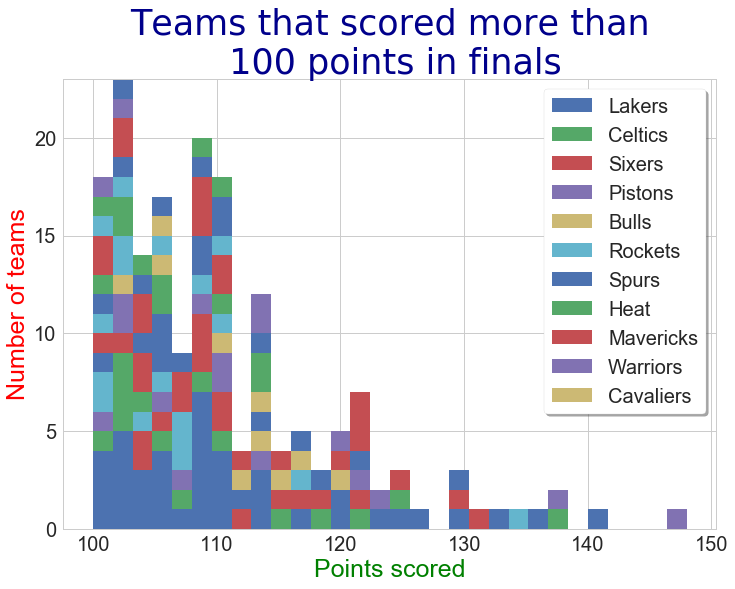

In [1019]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.title('Teams that scored more than\n 100 points in finals', fontsize=35, color='DarkBlue', fontname='Console')
plt.ylabel('Number of teams', fontsize=25, color='Red')
plt.xlabel('Points scored', fontsize=25, color='Green')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':20})
plt.show()

In [1055]:
champs.head(2)

,X,Year,Team,Game,Win,Home,MP,FG,FGP,TP,TPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,1980,Lakers,1,1,1,240,48,0.539,0,0,13,15,12,31,43,30,5,9,17,24,109
1,2,1980,Lakers,2,0,1,240,48,0.505,0,1,8,12,15,37,52,32,12,7,26,27,104


In [1056]:
data3.columns

Index(['Unnamed: 0', 'Year', 'Status', 'Team', 'PTS', 'FG', 'FGA', 'FGP', 'TP',
       'TPA', 'TPP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF'],
      dtype='object')

In [1146]:
champsAvg = champs[['Year', 'PTS', 'FG', 'FGP', 'TP',
       'TPA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF']].groupby('Year', as_index=False).mean().round(1)

In [1147]:
finals.head()

,ChampionTeam,RunnerupTeam,Year
0,Lakers,Sixers,1980
1,Celtics,Rockets,1981
2,Lakers,Sixers,1982
3,Sixers,Lakers,1983
4,Celtics,Lakers,1984


In [1148]:
teams = finals.ChampionTeam.tolist()

In [1149]:
champsAvg.insert(1, 'Team', teams)

In [1150]:
champsAvg.head()

,Year,Team,PTS,FG,FGP,TP,TPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,1980,Lakers,109.5,45.0,0.5,0.0,0.7,19.5,24.0,17.2,34.2,51.3,26.7,9.2,6.2,20.0,24.5
1,1981,Celtics,96.5,40.2,0.5,0.5,2.8,15.7,21.5,16.7,30.7,47.3,22.8,6.7,5.3,16.8,23.2
2,1982,Lakers,112.3,45.5,0.5,0.2,1.5,21.2,31.5,18.3,29.0,47.3,31.3,10.7,7.0,19.3,25.5
3,1983,Sixers,110.5,43.0,0.5,0.0,0.8,24.5,34.5,18.0,30.0,48.0,26.0,11.0,8.0,17.0,22.2
4,1984,Celtics,116.0,42.0,0.5,1.3,3.3,30.7,38.6,17.4,30.0,47.4,24.1,9.9,4.6,15.9,28.1


In [1151]:
teamsAvg = champs[['Team', 'PTS', 'FG', 'FGP', 'TP',
       'TPA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF']].groupby('Team', as_index=False).mean().round(1)

In [1152]:
teamsAvg

,Team,PTS,FG,FGP,TP,TPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,Bulls,96.7,37.2,0.5,4.7,14.1,17.6,24.1,12.6,27.2,39.8,23.4,8.4,4.9,12.7,23.4
1,Cavaliers,100.4,37.6,0.5,8.0,24.3,17.3,23.9,11.7,32.1,43.9,18.0,9.3,5.4,13.3,21.0
2,Celtics,106.0,40.1,0.5,3.0,7.7,22.8,29.1,15.1,30.5,45.6,24.5,8.8,5.2,15.4,24.4
3,Heat,97.0,35.6,0.5,7.7,19.5,18.2,25.6,10.1,31.2,41.2,18.8,7.8,4.3,13.1,21.6
4,Lakers,105.2,40.3,0.5,3.5,9.6,21.2,29.4,13.0,30.1,43.2,24.1,7.9,5.7,13.9,23.8
5,Mavericks,94.7,33.0,0.5,8.5,20.7,20.2,25.8,9.2,28.5,37.7,18.2,7.2,4.0,13.2,19.7
6,Pistons,101.8,37.2,0.5,3.6,10.1,23.7,32.4,13.5,29.7,43.2,20.0,5.9,4.7,13.1,25.4
7,Rockets,96.3,35.0,0.4,6.7,19.4,19.5,25.6,10.7,30.5,41.2,22.8,8.2,5.1,13.4,21.1
8,Sixers,110.5,43.0,0.5,0.0,0.8,24.5,34.5,18.0,30.0,48.0,26.0,11.0,8.0,17.0,22.2
9,Spurs,89.6,32.5,0.5,6.7,17.1,17.9,25.2,10.5,31.5,42.0,19.2,6.5,5.9,14.7,19.9


In [1153]:
teamsAvg.Team.unique()

array(['Bulls', 'Cavaliers', 'Celtics', 'Heat', 'Lakers', 'Mavericks',
       'Pistons', 'Rockets', 'Sixers', 'Spurs', 'Warriors'], dtype=object)